In [216]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from utility_functions import report
# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import PCA
from fma_metadata import utils
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [217]:
features = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/features.csv')

In [218]:
gen_labels = pd.read_csv('/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2/Data/Labels [generated]/labels_genre_top.csv')
gen_labels.set_index('track_id', inplace=True)
gen_labels.head()

,genre_top
track_id,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
20,NaN


In [219]:
mfcc= features['mfcc']
mfcc.head()

statistics   kurtosis                                                    \
number             01        02        03        04        05        06   
track_id                                                                  
2            3.856789  1.541901  0.000816  0.330728  0.118731 -0.342687   
3            4.296755  1.399977  0.112535 -0.211170  0.032953 -0.023489   
5            2.624517  2.415293  0.440233 -0.782131 -0.771069 -0.724216   
10           5.076893  1.161854  2.095651  1.372743 -0.203574 -0.345354   
20          11.880132  4.085320  0.002655  1.518562  0.181947  0.339014   

statistics                                          ...        std             \
number            07        08        09        10  ...         11         12   
track_id                                            ...                         
2          -0.259252  0.146735  0.410656 -0.162872  ...  10.059609   8.601942   
3           0.150404  0.046454  0.033484 -0.064596  ...   8.771966  10.026867   
5           0.090260  0.152119  0.261731 -0.608905  ...   8.863638   9.581952   
10         -0.529139  0.561974  0.281350 -0.150672  ...   8.289734   7.985110   
20          0.367611  0.069932 -0.016032  0.026012  ...   7.706648   6.498904   

statistics                                                              \
number            13        14        15        16        17        18   
track_id                                                                 
2           9.284250  9.245516  8.520863  8.560472  7.651871  7.246555   
3           6.978541  7.650417  9.600357  7.222888  8.398293  7.285423   
5           8.895723  8.141456  8.201844  7.780963  7.132692  7.539753   
10          7.075400  6.972649  7.071393  7.270959  7.051070  6.928591   
20          6.845514  6.934421  7.019398  6.983841  6.813648  7.520811   

statistics                      
number            19        20  
track_id                        
2           7.077188  7.391859  
3           7.417791  8.777440  
5           8.452527  7.334442  
10          6.430473  6.186294  
20          7.098001  7.032246  

[5 rows x 140 columns]

In [220]:
mfcc = features['mfcc'].merge(gen_labels, on='track_id')
mfcc.head()

,"(kurtosis, 01)","(kurtosis, 02)","(kurtosis, 03)","(kurtosis, 04)","(kurtosis, 05)","(kurtosis, 06)","(kurtosis, 07)","(kurtosis, 08)","(kurtosis, 09)","(kurtosis, 10)",...,"(std, 12)","(std, 13)","(std, 14)","(std, 15)","(std, 16)","(std, 17)","(std, 18)","(std, 19)","(std, 20)",genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
2,3.856789,1.541901,0.000816,0.330728,0.118731,-0.342687,-0.259252,0.146735,0.410656,-0.162872,...,8.601942,9.284250,9.245516,8.520863,8.560472,7.651871,7.246555,7.077188,7.391859,Hip-Hop
3,4.296755,1.399977,0.112535,-0.211170,0.032953,-0.023489,0.150404,0.046454,0.033484,-0.064596,...,10.026867,6.978541,7.650417,9.600357,7.222888,8.398293,7.285423,7.417791,8.777440,Hip-Hop
5,2.624517,2.415293,0.440233,-0.782131,-0.771069,-0.724216,0.090260,0.152119,0.261731,-0.608905,...,9.581952,8.895723,8.141456,8.201844,7.780963,7.132692,7.539753,8.452527,7.334442,Hip-Hop
10,5.076893,1.161854,2.095651,1.372743,-0.203574,-0.345354,-0.529139,0.561974,0.281350,-0.150672,...,7.985110,7.075400,6.972649,7.071393,7.270959,7.051070,6.928591,6.430473,6.186294,Pop
20,11.880132,4.085320,0.002655,1.518562,0.181947,0.339014,0.367611,0.069932,-0.016032,0.026012,...,6.498904,6.845514,6.934421,7.019398,6.983841,6.813648,7.520811,7.098001,7.032246,NaN


### Preprocessing - removing NaN values

In [221]:
mfcc.isnull().sum()

(kurtosis, 01)        0
(kurtosis, 02)        0
(kurtosis, 03)        0
(kurtosis, 04)        0
(kurtosis, 05)        0
                  ...  
(std, 17)             0
(std, 18)             0
(std, 19)             0
(std, 20)             0
genre_top         56976
Length: 141, dtype: int64

In [222]:
mfcc.dropna(axis=0, inplace=True)

In [223]:
mfcc.isnull().sum()

(kurtosis, 01)    0
(kurtosis, 02)    0
(kurtosis, 03)    0
(kurtosis, 04)    0
(kurtosis, 05)    0
                 ..
(std, 17)         0
(std, 18)         0
(std, 19)         0
(std, 20)         0
genre_top         0
Length: 141, dtype: int64

In [224]:
mfcc.shape

(49598, 141)

In [225]:
mfcc.genre_top.value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

In [226]:
# selecting a subset of genres to predict
#genres =['Rock' ,'Hip-Hop']
#genres =['Rock' ,'Classical']
genres =['Rock' ,'Jazz']

# take name of second genre in genres[1] to change name on graphs if we decide to change the minority genre
min_gen = genres[1]

# selecting subset of mfcc
mfcc = mfcc[mfcc['genre_top'].isin(genres)]
print(mfcc.shape)
mfcc.head()

(14753, 141)


,"(kurtosis, 01)","(kurtosis, 02)","(kurtosis, 03)","(kurtosis, 04)","(kurtosis, 05)","(kurtosis, 06)","(kurtosis, 07)","(kurtosis, 08)","(kurtosis, 09)","(kurtosis, 10)",...,"(std, 12)","(std, 13)","(std, 14)","(std, 15)","(std, 16)","(std, 17)","(std, 18)","(std, 19)","(std, 20)",genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
135,2.021638,0.269172,0.755836,0.861484,1.909718,0.382428,3.033167,0.276814,0.344835,0.095461,...,8.129856,7.796185,6.755871,6.407472,5.984369,6.050004,5.692363,6.055962,5.925325,Rock
136,13.691644,0.702855,2.484976,7.980183,0.209275,1.472870,2.104760,0.164231,0.288295,0.212297,...,8.477464,8.295549,8.519705,8.484787,7.838695,7.337792,7.240948,6.968402,6.127878,Rock
144,6.586777,1.421513,1.383764,0.763845,0.634919,-0.051154,0.413086,0.035357,0.114214,0.221261,...,8.368807,7.625874,7.041018,8.207975,8.031372,7.825096,7.014490,7.463882,6.668359,Jazz
145,7.623410,1.127034,1.697398,1.010504,1.177941,0.591382,0.473415,-0.014476,0.876584,0.134523,...,8.377079,8.134393,7.774636,8.014478,7.751091,8.993996,8.113119,8.658767,8.382182,Jazz
146,1.251770,3.155344,2.364142,0.780887,1.052353,-0.172692,-0.032207,0.017253,0.167330,0.044479,...,9.665651,8.789884,8.413019,8.228447,8.649169,8.442704,8.155684,7.881686,7.659285,Jazz


In [227]:
pd.concat([mfcc.genre_top.value_counts(),
                round(mfcc.genre_top.value_counts(normalize=True).mul(100),2)],axis=1, keys=('counts','percentage (%)'))

,counts,percentage (%)
Rock,14182,96.13
Jazz,571,3.87


In [228]:
# label encoding
# encoding labels
le = preprocessing.LabelEncoder()
mfcc['genre_top'] = le.fit_transform(mfcc['genre_top'])

In [229]:
print(f'Legend:\n1: Rock\n0: {genres[1]}')
mfcc.genre_top.value_counts()


Legend:
1: Rock
0: Jazz


1    14182
0      571
Name: genre_top, dtype: int64

In [230]:
# Define the labels
labels = mfcc[['genre_top']]
# labels has as index the id_track, this creates problems when plotting data after the features have been normalized.
# we reset the index from 0 to n
labels.reset_index(drop=True, inplace=True)
labels = labels['genre_top']

In [231]:
mfcc.drop('genre_top', axis=1, inplace=True)

In [232]:
# normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(mfcc)

# 1. PCA on scaled data
### 1.1 scree-plot

Text(0.5, 0, 'Principal Component #')

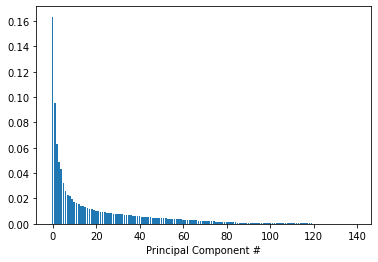

In [233]:
pca = PCA()
pca.fit(scaled_features)
# get explained variance ratios from PCA using all features
exp_variance = pca.explained_variance_ratio_
# plot explained variance
fig, ax= plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel('Principal Component #')

### 1.2 cumulative explained variance plot

Optimal number of components: 53
Explained variation per principal component:
[1.63518094e-01 9.56602999e-02 6.27669647e-02 4.91516795e-02
 4.31838997e-02 3.20187276e-02 2.57468919e-02 2.29113870e-02
 2.16231289e-02 1.93810968e-02 1.72951911e-02 1.63193230e-02
 1.53586079e-02 1.41190604e-02 1.37319382e-02 1.30250578e-02
 1.23387695e-02 1.18080907e-02 1.13906281e-02 1.10860063e-02
 1.01548013e-02 1.00437267e-02 9.56820423e-03 9.21919565e-03
 9.07255020e-03 8.74658783e-03 8.66583365e-03 8.21857219e-03
 8.03914711e-03 7.98496946e-03 7.80870135e-03 7.62099908e-03
 7.50442444e-03 7.28417965e-03 7.18786320e-03 6.89855886e-03
 6.74887562e-03 6.53909316e-03 6.28095729e-03 6.14709073e-03
 6.04444330e-03 5.70653092e-03 5.44105469e-03 5.38038216e-03
 5.26010215e-03 5.14662040e-03 4.89012474e-03 4.87139995e-03
 4.77357268e-03 4.61729524e-03 4.58450450e-03 4.40781724e-03
 4.27905961e-03 4.11535440e-03 3.86865928e-03 3.81333105e-03
 3.69669543e-03 3.64013776e-03 3.56945960e-03 3.42628432e-03
 3.3767

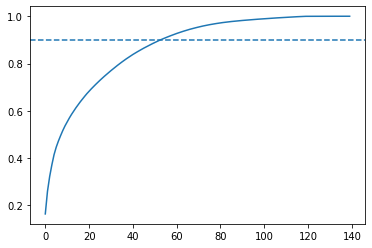

In [234]:
# calculate the cumulative explained variance
cum_exp_var = np.cumsum(exp_variance)

# plot the cumulative explained variance and draw a dashed line at 0.9\
# This line indicates how much variance (information) we want to retain
fig, ax= plt.subplots()
ax.plot(cum_exp_var)
ax.axhline(y=0.9, linestyle='--')

# find index where cum_exp_var exceeds 0.9 and adding 1 to that index to get the num of components
n_components = ((np.where(cum_exp_var > 0.9))[0][0])
print(f"Optimal number of components: {n_components}")
print(f"Explained variation per principal component:\n{pca.explained_variance_ratio_}")
# perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components=n_components,random_state=10)
pca.fit(scaled_features)
pca_proj = pca.transform(scaled_features)

In [235]:
pca_proj.shape

(14753, 53)

### 1.3 plot PCA in 2D

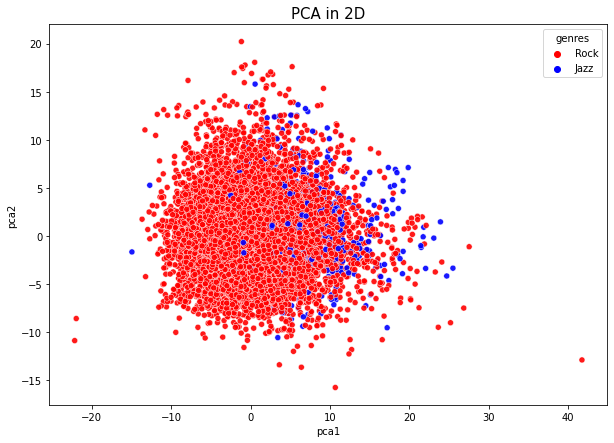

In [236]:
# generating df for plotting PCA
df = pd.DataFrame()
df['pca1'] = pca_proj[:,0]
df['pca2'] = pca_proj[:,1]
df['pca3'] = pca_proj[:,2]
df['genres'] = labels.apply(lambda x: "Rock" if x==1 else str(genres[1]))

# plot scatter of PCA
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='genres',
    palette={str(genres[1]):'blue','Rock':'red'},
    data=df,
    legend="full",
    alpha=0.9
)
plt.title("PCA in 2D", fontsize= 15)
plt.show()


# 1.4 plot PCA in 3D

In [237]:
# 3D PCA
#total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    df, x='pca1', y='pca2', z='pca3', color='genres'
    #title=f'Total Explained Variance: {total_var:.2f}%',
    #labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_layout(
    legend=dict(
    orientation="v",
    yanchor="bottom",
    y=0.8,
    xanchor="right",
    x=0.6),
width=700, height=700, scene_camera_eye_z=0.8
)

fig.show()

# 2. Model selection

In [238]:
# shuffle and split into development set and internal test set:
# (PCA)
Xpca_develop, Xpca_test, y_develop_pca, y_test_pca = train_test_split(
pca_proj, labels, test_size=0.30, random_state=10)

# (no PCA)
X_develop, X_test, y_develop, y_test = train_test_split(
scaled_features, labels, test_size=0.30, random_state=10)

In [239]:
# check partition
print(f"____Legend____\n1: Rock\n0: {genres[1]}\n\n***PCA***\nDevelopment set:\
\n{y_develop_pca.value_counts()}\n\nInternal Test:\n{y_test_pca.value_counts()}\n\n\
-----------------\n\
***No-PCA***\nDevelopment set:\n{y_develop.value_counts()}\n\nInternal Test:\n{y_test.value_counts()}")

____Legend____
1: Rock
0: Jazz

***PCA***
Development set:
1    9955
0     372
Name: genre_top, dtype: int64

Internal Test:
1    4227
0     199
Name: genre_top, dtype: int64

-----------------
***No-PCA***
Development set:
1    9955
0     372
Name: genre_top, dtype: int64

Internal Test:
1    4227
0     199
Name: genre_top, dtype: int64


# 2.1 Decision Tree -  Unbalanced - without PCA

### 2.1.1 5 fold cross validation - grid search

In [240]:
param_grid = {
               "max_depth": [3,5,6,8,10, None],
               "min_samples_leaf": [25,35,45,55,75,150,None],
               "criterion": ["gini", "entropy"]
             }
# model
dtc = DecisionTreeClassifier()
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = GridSearchCV(dtc, cv =stratified_cv , param_grid=param_grid, n_jobs=2, verbose=True)

random_search.fit(X_develop, y_develop)
dtc=random_search.best_estimator_
report(random_search.cv_results_, n_top=10)


Fitting 5 folds for each of 84 candidates, totalling 420 fits
Model with rank: 1
Mean validation score: 0.966 (std: 0.003)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 75}

Model with rank: 1
Mean validation score: 0.966 (std: 0.003)
Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 75}

Model with rank: 1
Mean validation score: 0.966 (std: 0.003)
Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 75}

Model with rank: 1
Mean validation score: 0.966 (std: 0.003)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 75}

Model with rank: 1
Mean validation score: 0.966 (std: 0.003)
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 75}

Model with rank: 6
Mean validation score: 0.966 (std: 0.003)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 55}

Model with rank: 6
Mean validation score: 0.966 (std: 0.003)
Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_sa

### 2.1.3 Retrain on full development set and prediction

Accuracy 0.9572977858111161
F1-score [0.20920502 0.97805643]
              precision    recall  f1-score   support

           0       0.62      0.13      0.21       199
           1       0.96      1.00      0.98      4227

    accuracy                           0.96      4426
   macro avg       0.79      0.56      0.59      4426
weighted avg       0.95      0.96      0.94      4426



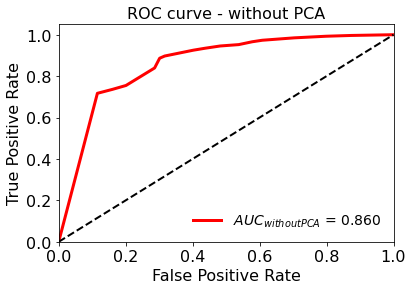

In [257]:
dtc = DecisionTreeClassifier(criterion= 'gini',max_depth=5, min_samples_leaf= 75)
dtc.fit(X_develop,y_develop)

y_pred_dtc = dtc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_dtc))
print('F1-score %s' % f1_score(y_test, y_pred_dtc, average=None))
print(classification_report(y_test, y_pred_dtc))

# y_score0 --> scores of decision tree without PCA
# fpr0, tpr0 ---> false positive and true positive of decision tree without PCA
y_score0 = dtc.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score0[:, 1])

# roc_auc0 --> ROC/AUC of decision tree without PCA
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='red', lw=3, label='$AUC_{without PCA}$ = %.3f' % roc_auc0)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - without PCA', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Legend:
0: Jazz
1: Rock
[[  25  174]
 [  15 4212]]


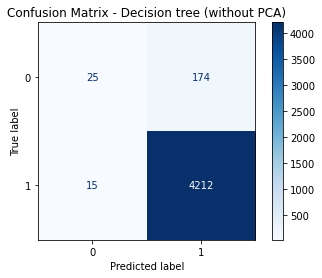

In [258]:
# confusion matrix - Internal Test
print(f"Legend:\n0: {genres[1]}\n1: Rock")
cm = plot_confusion_matrix(dtc,X_test,y_test,
                            cmap = plt.cm.Blues)
cm.ax_.set_title('Confusion Matrix - Decision tree (without PCA)')
print(cm.confusion_matrix)
plt.show()

# 2.2 Decision Tree -  Unbalanced - with PCA
### 2.2.2 5 fold cross validation - grid search

In [243]:
# model
dtc_pca = DecisionTreeClassifier()
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search_pca = GridSearchCV(dtc, cv =stratified_cv , param_grid=param_grid, n_jobs=2, verbose=True)

random_search_pca.fit(Xpca_develop, y_develop_pca)
dtc_pca=random_search_pca.best_estimator_
report(random_search_pca.cv_results_, n_top=10)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Model with rank: 1
Mean validation score: 0.965 (std: 0.002)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 45}

Model with rank: 1
Mean validation score: 0.965 (std: 0.002)
Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 45}

Model with rank: 1
Mean validation score: 0.965 (std: 0.002)
Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 45}

Model with rank: 1
Mean validation score: 0.965 (std: 0.002)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 45}

Model with rank: 1
Mean validation score: 0.965 (std: 0.002)
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 45}

Model with rank: 6
Mean validation score: 0.965 (std: 0.002)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 55}

Model with rank: 6
Mean validation score: 0.965 (std: 0.002)
Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_sa

### 2.2.3 Retrain on full development set and prediction

Accuracy 0.9575237234523272
F1-score [0.265625   0.97812936]
              precision    recall  f1-score   support

           0       0.60      0.17      0.27       199
           1       0.96      0.99      0.98      4227

    accuracy                           0.96      4426
   macro avg       0.78      0.58      0.62      4426
weighted avg       0.95      0.96      0.95      4426



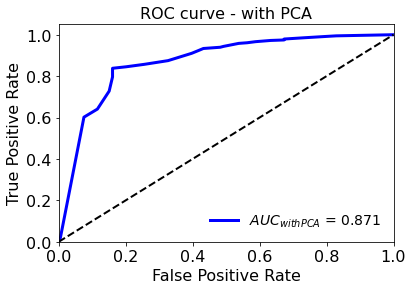

In [260]:
dtc_pca = DecisionTreeClassifier(criterion= 'gini',max_depth=5, min_samples_leaf= 45)
dtc_pca.fit(Xpca_develop,y_develop_pca)

y_pred_dtc_pca = dtc_pca.predict(Xpca_test)

print('Accuracy %s' % accuracy_score(y_test_pca, y_pred_dtc_pca))
print('F1-score %s' % f1_score(y_test_pca, y_pred_dtc_pca, average=None))
print(classification_report(y_test_pca, y_pred_dtc_pca))

# y_score1 --> scores of decision tree with PCA
# fpr1, tpr1 ---> false positive and true positive of decision tree with PCA
y_score1 = dtc_pca.predict_proba(Xpca_test)
fpr1, tpr1, _ = roc_curve(y_test_pca, y_score1[:, 1])

# roc_auc1 --> ROC/AUC of decision tree with PCA
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, color='blue', lw=3, label='$AUC_{with PCA}$ = %.3f' % roc_auc1)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - with PCA', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Legend:
0: Jazz
1: Rock
[[  34  165]
 [  23 4204]]


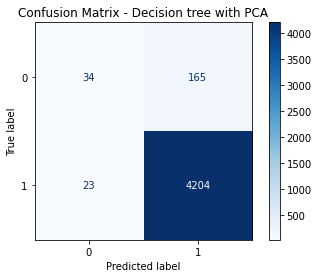

In [261]:
# confusion matrix Decision tree with PCA
print(f"Legend:\n0: {genres[1]}\n1: Rock")
cm_pca = plot_confusion_matrix(dtc_pca,Xpca_test,y_test_pca,
                            cmap = plt.cm.Blues)
cm_pca.ax_.set_title('Confusion Matrix - Decision tree with PCA')
print(cm_pca.confusion_matrix)
plt.show()

# 2.3 Comparing ROC Decision tree (unbalanced) with and without PCA

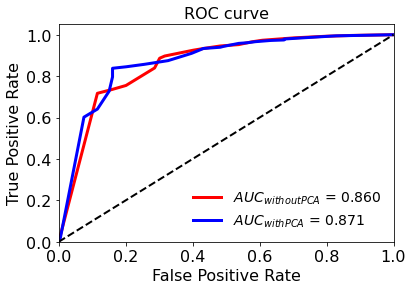

In [262]:
plt.plot(fpr0, tpr0, color='red', lw=3, label='$AUC_{without PCA}$ = %.3f' % roc_auc0)
plt.plot(fpr1, tpr1, color='blue', lw=3, label='$AUC_{with PCA}$ = %.3f' % roc_auc1)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

The model with PCA performed slightly better.

# 3.1 KNN binary class - Unbalanced (without PCA)

### 3.1.1 10 fold cross validation - grid search

In [247]:
# range of k to try - find a good range of k
k_range = range(1, 150)
# empty list to store scores
k_scores = []

for k in tqdm(k_range):
    # run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_develop, y_develop, cv=10, scoring='accuracy')
    # append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)
print(f"maximum score: {max(k_scores)} for k = {k_scores.index(max(k_scores))+1}")

100%|██████████| 149/149 [07:53<00:00,  3.18s/it]


[0.9635888733800101, 0.9467404151376663, 0.9698834770406057, 0.9651386043509909, 0.9718196792663802, 0.9692055576817727, 0.970658014213137, 0.9691084708495614, 0.9711426979445733, 0.9708520002701546, 0.9712395033656769, 0.9701741747150244, 0.9702713553509386, 0.9699807514802226, 0.9704650599968483, 0.9698841336665242, 0.9710458925234697, 0.970658295624245, 0.9703682545757447, 0.969787234441718, 0.9699812204987355, 0.9700779321161365, 0.9705621468290596, 0.9699810328913303, 0.9696905228243169, 0.9697871406380152, 0.9698839460591188, 0.9697871406380154, 0.9699808452839251, 0.969496630571002, 0.9694000127573036, 0.9690126972691868, 0.9694001065610062, 0.9694001065610062, 0.9697874220491232, 0.9693032073362, 0.9694970057858125, 0.9697874220491232, 0.9696905228243169, 0.9694967243747046, 0.9695937174032133, 0.9693031135324974, 0.9699811266950329, 0.9694001065610063, 0.9697876096565284, 0.9695937174032133, 0.969884415077632, 0.9698842274702267, 0.9698845088813346, 0.9694970995895151, 0.96969

Text(0, 0.5, 'Cross-validated accuracy')

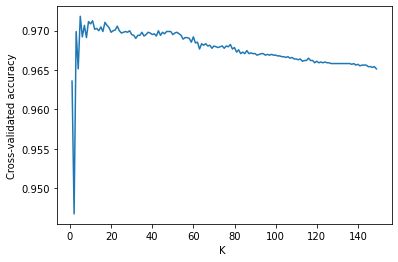

In [248]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('K ')
plt.ylabel('Cross-validated accuracy')

## 3.1.2 Prediction on Internal test set (KNN - without PCA)

              precision    recall  f1-score   support

           0       0.75      0.49      0.59       199
           1       0.98      0.99      0.98      4227

    accuracy                           0.97      4426
   macro avg       0.86      0.74      0.79      4426
weighted avg       0.97      0.97      0.97      4426

legend:
0: Jazz
1: Rock


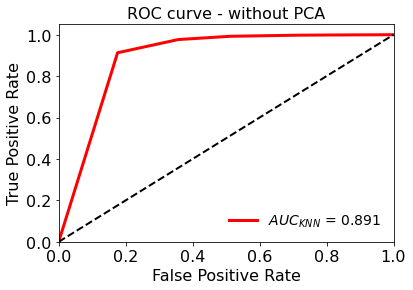

In [263]:
knn_classifier =  KNeighborsClassifier(n_neighbors = 5)
# retrain knn on the whole development set
knn_classifier.fit(X_develop, y_develop)
# predict target variable
y_pred_knn0 = knn_classifier.predict(X_test)
# display classification report
print(classification_report(y_test, y_pred_knn0))
print(f'legend:\n0: {genres[1]}\n1: Rock')

# plot ROC curve -KNN
y_score_knn0 = knn_classifier.predict_proba(X_test)
fpr_knn0, tpr_knn0, _ = roc_curve(y_test, y_score_knn0[:, 1])
roc_auc_knn0 = auc(fpr_knn0, tpr_knn0)

plt.plot(fpr_knn0, tpr_knn0, color='red', lw=3, label='$AUC_{KNN}$ = %.3f' % roc_auc_knn0)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - without PCA', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Legend:
0: Jazz
1: Rock
[[  97  102]
 [  32 4195]]


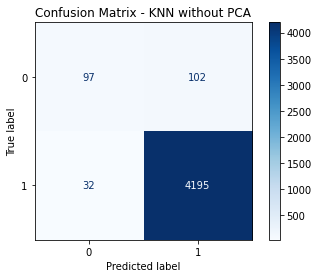

In [264]:
# confusion matrix KNN - Internal test
print(f"Legend:\n0: {genres[1]}\n1: Rock")
cm_knn = plot_confusion_matrix(knn_classifier,X_test,y_test,
                            cmap = plt.cm.Blues)
cm_knn.ax_.set_title('Confusion Matrix - KNN without PCA')
print(cm_knn.confusion_matrix)
plt.show()

# 3.2 KNN binary class - Unbalanced (with PCA)
### 3.2.1 10 fold cross validation - grid search

In [251]:
# range of k to try - find a good range of k
k_range = range(1, 50)
# empty list to store scores
k_scores = []

for k in tqdm(k_range):
    # run KNeighborsClassifier with k neighbours
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    # obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn_pca, Xpca_develop, y_develop_pca, cv=10, scoring='accuracy')
    # append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)
print(f"maximum score: {max(k_scores)} for k = {k_scores.index(max(k_scores))+1}")

100%|██████████| 49/49 [02:28<00:00,  3.03s/it]


[0.9640731818966358, 0.946256012817338, 0.9694965367672994, 0.9650417989298873, 0.9719175165282123, 0.9691091274754797, 0.9710457049160646, 0.9709489932986635, 0.9707553824564563, 0.9704647785857403, 0.9705613963994388, 0.9707551010453483, 0.9701745499298349, 0.9703684421831499, 0.9704650599968481, 0.9700777445087313, 0.9705617716142492, 0.9702712615472358, 0.9703681607720419, 0.9693997313461958, 0.9698841336665242, 0.9694969119821097, 0.9697874220491232, 0.9697873282454206, 0.9699810328913303, 0.9694969119821097, 0.9698843212739293, 0.9695936235995107, 0.9700778383124339, 0.9691094088865876, 0.9695937174032133, 0.9696905228243169, 0.9692064019150965, 0.9694968181784072, 0.9694001065610063, 0.9697874220491232, 0.9693034887473079, 0.9694001065610063, 0.9694973810006229, 0.969012884876592, 0.9691096902976953, 0.9693032073362, 0.9687224686132812, 0.9688192740343847, 0.9684319585462677, 0.9692067771299069, 0.969400387972114, 0.9693034887473079, 0.9689160794554883]
maximum score: 0.97191751

Text(0, 0.5, 'Cross-validated accuracy')

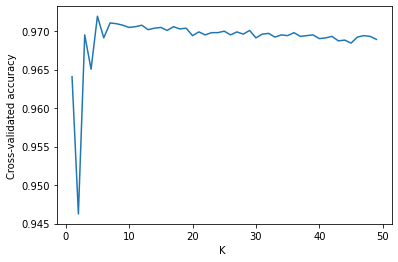

In [252]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('K ')
plt.ylabel('Cross-validated accuracy')

## 3.1.2 Prediction on Internal test set (KNN - with PCA)

              precision    recall  f1-score   support

           0       0.72      0.42      0.53       199
           1       0.97      0.99      0.98      4227

    accuracy                           0.97      4426
   macro avg       0.85      0.70      0.76      4426
weighted avg       0.96      0.97      0.96      4426

legend:
0: Jazz
1: Rock


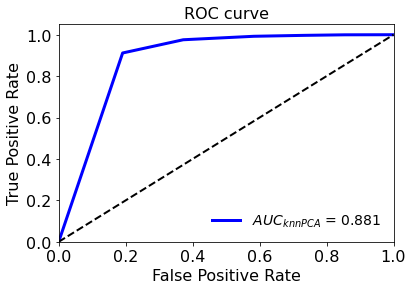

In [265]:
knn_classifier_pca =  KNeighborsClassifier(n_neighbors = 5)

# retrain knn on the whole development set
knn_classifier_pca.fit(Xpca_develop, y_develop_pca)
# predict target variable
y_pred_knn1 = knn_classifier_pca.predict(Xpca_test)
# display classification report
print(classification_report(y_test_pca, y_pred_knn1))
print(f'legend:\n0: {genres[1]}\n1: Rock')

# plot ROC curve -KNN
y_score_knn1 = knn_classifier_pca.predict_proba(Xpca_test)
fpr_knn1, tpr_knn1, _ = roc_curve(y_test_pca, y_score_knn1[:, 1])
roc_auc_knn1 = auc(fpr_knn1, tpr_knn1)

plt.plot(fpr_knn1, tpr_knn1, color='blue', lw=3, label='$AUC_{knnPCA}$ = %.3f' % roc_auc_knn1)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Compare KNN ROC with and without PCA

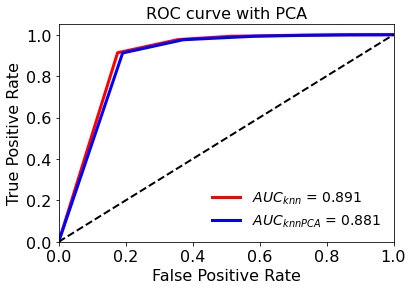

In [266]:
plt.plot(fpr_knn0, tpr_knn0, color='red', lw=3, label='$AUC_{knn}$ = %.3f' % roc_auc_knn0)
plt.plot(fpr_knn1, tpr_knn1, color='blue', lw=3, label='$AUC_{knnPCA}$ = %.3f' % roc_auc_knn1)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve with PCA', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Compare Decision tree and KNN (no PCA)

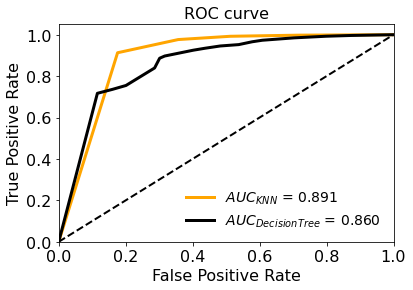

In [267]:
plt.plot(fpr_knn0, tpr_knn0, color='orange', lw=3, label='$AUC_{KNN}$ = %.3f' % roc_auc_knn0)
plt.plot(fpr0, tpr0, color='black', lw=3, label='$AUC_{DecisionTree}$ = %.3f' % roc_auc0)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)

# Compare Decision tree and KNN (PCA)

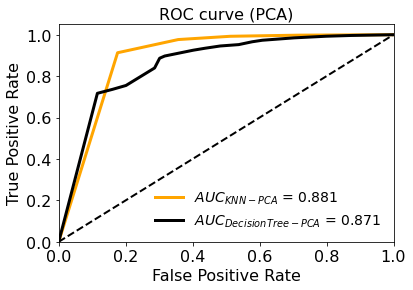

In [268]:
plt.plot(fpr_knn0, tpr_knn0, color='orange', lw=3, label='$AUC_{KNN-PCA}$ = %.3f' % roc_auc_knn1)
plt.plot(fpr0, tpr0, color='black', lw=3, label='$AUC_{DecisionTree-PCA}$ = %.3f' % roc_auc1)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (PCA)', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
